---
# Analyzing Shark Tank deals
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
plt.style.use('seaborn')
FS = 16
# from genderize import Genderize

## Load the data

In [2]:
# https://www.quora.com/What-have-you-learned-from-watching-the-television-program-Shark-Tank/answer/Halle-Tecco
df = pd.read_csv('./data/SharkTankData_WithAttendance.csv').dropna(subset=['gender'])
# df = pd.read_csv('./data/old/SharkTankData.csv').dropna(subset=['gender'])
# df = df[df.gender != 'Mixed Team'] # Only keep male and female contestants

In [3]:
sharks = ['Corcoran', 'Greiner', 'Cuban', 'Herjavec', 'John', "O'Leary"]
shark_genders = dict(zip(sharks,['f','f','m','m','m','m']))
for shark in sharks:
    df[shark].fillna(0, inplace=True)

In [4]:
df.head()

,Unnamed: 0,Row,Season,No. in series,Company,Deal,Industry,gender,Amount,Equity,...,Cuban_present,John_present,Corcoran_present,Herjavec_present,O'Leary_present,Greiner_present,Daymond_present,Kevin_present,Barbara_present,Robert_present
0,1,2.0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,2,3.0,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,3,4.0,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,4,5.0,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,5,6.0,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [5]:
# Ratio of male and female entrepreneurs
print(100*(df.gender=='Male').sum()/len(df))
print(100*(df.gender=='Female').sum()/len(df))

70.23809523809524
29.761904761904763


## Bar graph of gender ratios appearing on show

In [5]:
genders = np.unique(df.gender)
gender_counts = np.zeros(len(genders))
for n,gender in enumerate(genders):
    gender_counts[n] = 100*(df.gender==gender).sum()/len(df)
    
x = np.arange(len(genders))    

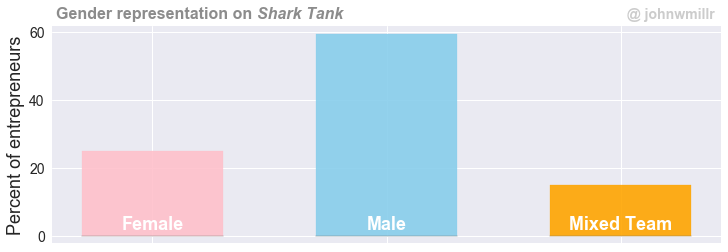

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
w = 0.6
barlist = ax.bar(x, gender_counts, width=w, alpha=0.9)
ax.set_xticklabels(genders)

# Plot the metric
ax.set_ylim([-2, 62])
ax.set_xticks(x)
ax.set_yticks(np.arange(0,61,20))
ax.set_ylabel('Percent of entrepreneurs', fontsize=FS+2)
ax.tick_params(labelsize=FS-2)
# ax.set_xticklabels(genders, weight='heavy', fontsize=FS+2)
ax.set_xticklabels([])
xlim = ax.get_xlim()

for X in x:  # Plot a horizontal line under each bar
    ax.plot([X-w/2,X+w/2], [0,0], 'gray', alpha=0.25)
ax.set_xlim(xlim)

# Touch up the plot
for b,c in zip(barlist, ['pink', 'skyblue', 'orange']):
    b.set_color(c)
    
for n in np.arange(len(x)):
    ax.text(x[n], 2, "{g}".format(g=genders[n]),
        fontsize=FS+2, ha='center', color='w', weight='heavy')
    
mid = ax.get_xlim()[0]
# ax.set_title('Gender representation on Shark Tank', fontsize=FS, weight='heavy')
params = {'fontsize': FS, 'weight': 'heavy', 'ha': 'left', 'alpha': 0.9, 'color':'gray'}
y = 64
ax.text(xlim[0]+0.02, y,'Gender representation on', fontdict=params)
ax.text(xlim[0]+0.879, y,'Shark Tank', fontdict=params, style='italic')
# ax.text(xlim[-1]-0.03, 56, '@ johnwmillr', fontdict=params, fontsize=FS-2, alpha=0.4, ha='right', rotation=-90)
ax.text(xlim[-1]-0.03, y, '@ johnwmillr', fontdict=params, fontsize=FS-2, alpha=0.4, ha='right')
# plt.show()
plt.savefig('./figures/gender_ratios.png', dpi=300, bbox_inches='tight')

# Relationship between gender and deal details

## How many men and women did each Shark see?
In other words, what episodes was each Shark on?

In [6]:
for shark in sharks:
    print('-'*30)
    pitches = {'t': df[shark+"_present"].sum(),
               'f': df[df.gender=='Female'][shark+"_present"].sum(),
               'm': df[df.gender=='Male'][shark+"_present"].sum()}
    funded = {'t': 100*df[shark].sum()/df[shark+"_present"].sum()}
    for g in ['Female','Male']:
        mask = (df.gender==g) & (df[shark+"_present"]==1)
        funded[g[0].lower()] = 100*df[mask][shark].sum()/df[df.gender==g][shark+"_present"].sum()

    print("{s} was present for {t:.0f} pitches.".format(s=shark, t=pitches['t']))
    print("""\tPitches from women: {f:3.0f} ({pf:3.1f}%). Funded: {ff:3.1f}%
        Pitches from men: {m:5.0f} ({pm:3.1f}%). Funded: {fm:3.1f}%""".format(
        f=pitches['f'], pf=100*pitches['f']/pitches['t'], ff=funded['f'],
        m=pitches['m'], pm=100*pitches['m']/pitches['t'], fm=funded['m']))

------------------------------
Corcoran was present for 269 pitches.
	Pitches from women:  84 (31.2%). Funded: 28.6%
        Pitches from men:   185 (68.8%). Funded: 10.3%
------------------------------
Greiner was present for 233 pitches.
	Pitches from women:  72 (30.9%). Funded: 20.8%
        Pitches from men:   161 (69.1%). Funded: 16.8%
------------------------------
Cuban was present for 344 pitches.
	Pitches from women:  99 (28.8%). Funded: 20.2%
        Pitches from men:   245 (71.2%). Funded: 17.1%
------------------------------
Herjavec was present for 404 pitches.
	Pitches from women: 122 (30.2%). Funded: 5.7%
        Pitches from men:   282 (69.8%). Funded: 13.5%
------------------------------
John was present for 338 pitches.
	Pitches from women:  94 (27.8%). Funded: 14.9%
        Pitches from men:   244 (72.2%). Funded: 13.9%
------------------------------
O'Leary was present for 420 pitches.
	Pitches from women: 125 (29.8%). Funded: 5.6%
        Pitches from men:   295 (7

## Percent of women and men funded by each shark

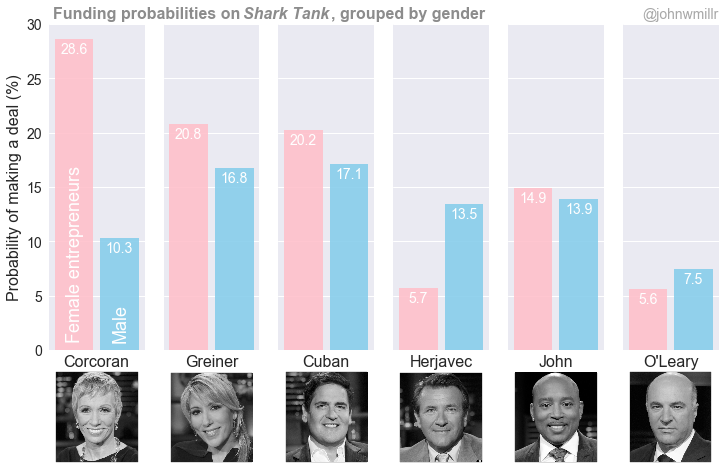

In [39]:
fig,axs = plt.subplots(ncols=len(sharks), figsize=(12,6), sharey=True)
for ax,shark in zip(axs,sharks):
    # Calculate the metric we'd like to plot
    percent_funded = []
    for g in ['Female', 'Male']:
        mask = (df[shark+"_present"]==1) & (df.gender==g)
        percent_funded.append(100*df[mask][shark].sum()/df[mask][shark+"_present"].sum())        
    mean_percent = 100*df[shark].sum()/df[shark+"_present"].sum()    
    metric = np.array(percent_funded)
    
    # Plot the metric
    x = [-0.5, 0.5]
    c = ['pink','skyblue']
    ax.bar(x, metric, width=0.85, color=c, alpha=0.9)
    ax.set_xticks([])
    ax.set_xlabel(shark, fontsize=FS)    
    ax.tick_params(labelsize=FS-2)
    ax.set_xlim([-1.05,1.05])
    
    # Touch up the plot
    if ax == axs[0]:
        ax.set_ylabel('Probability of making a deal (%)', fontsize=FS)
        ax.text(x[0]-0.18, 0.75, 'Female entrepreneurs', ha='left', va='bottom', fontsize=FS+2, alpha=1, rotation=90, color='w')
        ax.text(x[1]-0.18, 0.75, 'Male', ha='left', va='bottom', fontsize=FS+2, alpha=1, rotation=90, color='w')
#         ax.text(-1.11, -3.35, "@ johnwmillr", fontsize=FS-2, alpha=0.3, ha='right', rotation=90)
        
        # Add the plot title
        params = {'fontsize': FS, 'weight': 'heavy', 'ha': 'left', 'alpha': 0.9, 'color':'gray'}
        y = 30.5
        xlim = ax.get_xlim()
        ax.text(xlim[0]+0.1, y,'Funding probabilities on', fontdict=params)
        ax.text(xlim[0]+4.27, y,'Shark Tank', fontdict=params, style='italic')
        ax.text(xlim[0]+6.2, y,', grouped by gender', fontdict=params)
                
    if ax == axs[-1]:        
        ax.text(1.05, 30.5, "@johnwmillr", fontsize=FS-2, alpha=0.4, ha='right')
        ax.text(0,-10,' ')
        
    # Add percent values to tops of bars
    for n in range(2):
        ax.text(x[n], percent_funded[n]-1.3, "{val:2.1f}".format(val=percent_funded[n]),
                fontsize=FS-2, ha='center', color='w')
                    
    # Add the faces to the plot
    im = plt.imread('./figures/sharks/{}.png'.format(shark.lower()))    

    imagebox = OffsetImage(im, zoom=0.16)
    imagebox.image.axes = ax

    height = -67
    ab = AnnotationBbox(imagebox, [0,0], xybox=(0,height), xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)        
                    
# plt.suptitle('Funding probabilities on Shark Tank, grouped by gender', y=0.93, fontsize=FS, fontweight='heavy')
plt.savefig('./figures/gender_bias_v02.png', dpi=300, bbox_inches='tight')
# plt.savefig('./figures/gender_bias_no_title.png', dpi=300, bbox_inches='tight')
# plt.show()

---
# Old plots

## Difference in funding rates for female and male contestants

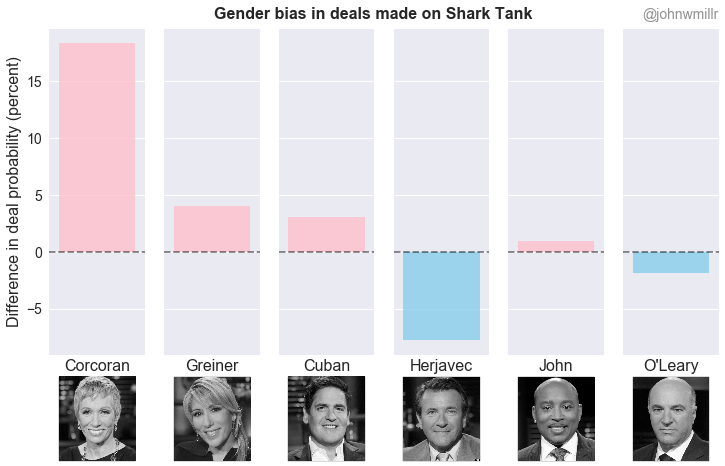

In [243]:
fig,axs = plt.subplots(ncols=len(sharks), figsize=(12,6), sharey=True)
for ax,shark in zip(axs,sharks):
    percent_funded = []
    for g in ['Female', 'Male']:
#         mask = ((df[shark+"_present"]==1) & (df[shark]==1)) & (df.gender==g)
#         percent_funded.append(100*df[shark][mask].sum()/df[shark+"_present"].sum())
        mask = (df[shark+"_present"]==1) & (df.gender==g)
        percent_funded.append(100*df[mask][shark].sum()/df[mask][shark+"_present"].sum())        
    mean_percent = 100*df[shark].sum()/df[shark+"_present"].sum()
    
    metric = -np.diff(percent_funded)
    c = 'pink' if metric >= 0 else 'skyblue'
#     c = 'pink' if shark_genders[shark]=='f' else 'skyblue'
    ax.bar(0, metric, color=c, alpha=0.8)
    ax.set_xticks([])
    ax.set_xlabel(shark, fontsize=FS)
#     ax.set_ylim((-8,2.5))
    
    ax.plot([-0.5,0.5], [0,0], color='k', linestyle='--', alpha=0.5)
    ax.set_xlim([-0.5,0.5])
    
    if ax == axs[0]:
        ax.set_ylabel('Difference in deal probability (percent)', fontsize=FS)
        
    if ax == axs[-1]:
        ax.text(0.5, 20.5, "@johnwmillr", fontsize=FS-2, alpha=0.5, horizontalalignment='right')        
        ax.text(0,-18,' ')        
        
    # Add the faces to the plot
    im = plt.imread('./figures/sharks/{}.png'.format(shark.lower()))
    xy = [0, 0]

    imagebox = OffsetImage(im, zoom=0.15)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(0,-167),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0)
    ax.add_artist(ab)        
        
    ax.tick_params(labelsize=FS-2)
        
plt.suptitle('Gender bias in deals made on Shark Tank', y=0.93, fontsize=FS, fontweight='heavy')
# plt.savefig('./figures/gender_bias.png', dpi=300, bbox_inches='tight')

Text(0.5,0.93,'Breakdown of deals on Shark Tank by gender')

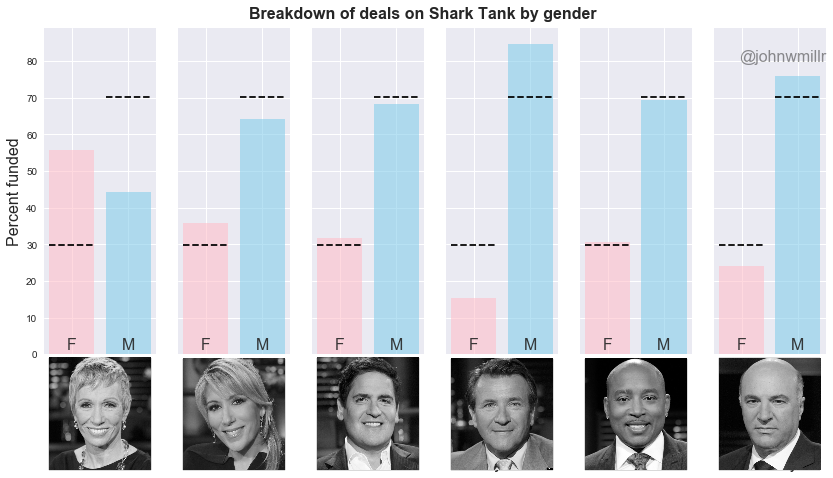

In [626]:
# Ratios of men and women appearing on show
gender_ratios = {'m': 100*(df.gender=='Male').sum()/df.shape[0], 'f': 100*(df.gender=='Female').sum()/df.shape[0]}

# gender_labels = ['Male','Female']
gender_labels = np.unique(df.gender)[:2]
fig, axs = plt.subplots(ncols=len(sharks), sharey=True, figsize=(14,6))
idxs = np.linspace(0,1,num=9)
for ax,shark,idx in zip(axs,sharks,idxs):
    percent_funded = []
    for n,gender in enumerate(gender_labels):
        num_gender = (df.gender==gender).sum()
        percent_funded.append(
#             100*((df.gender==gender).values * df[shark].values).sum()/df[shark].sum()-gender_ratios[gender[0].lower()])
            100*((df.gender==gender) * df[shark]).sum()/df[shark].sum())        
        
    # Plot the reference line
    ax.plot([ 0.6, 1.4], gender_ratios['m']*np.array([1, 1]), color='k', linestyle='--')
    ax.plot([-0.4, 0.4], gender_ratios['f']*np.array([1, 1]), color='k', linestyle='--')
        
    # Bar plot
    ax.bar([0,1], percent_funded, color=['pink','skyblue'], alpha=0.6)
    if ax==axs[0]:
        ax.set_ylabel('Percent funded', fontsize=FS)
    ax.set_xticklabels([])
    ax.text(0,1.4,'F', horizontalalignment='center', fontsize=FS, alpha=0.9)
    ax.text(1,1.4,'M', horizontalalignment='center', fontsize=FS, alpha=0.9)
    
    if ax == axs[-1]:
        ax.text(1.5, 80, "@johnwmillr", fontsize=FS, alpha=0.5, horizontalalignment='right')
        ax.text(0.5, -30, " ", fontsize=FS-2, alpha=0.5, horizontalalignment='center')
        
    im = plt.imread('./figures/sharks/{}.png'.format(shark.lower()))
    xy = [0, 0]

    imagebox = OffsetImage(im, zoom=0.2)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(28,-60),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0)
    ax.add_artist(ab)        
    ax.text(0.5, -31, shark, fontsize=FS, horizontalalignment='center')
    
plt.suptitle('Breakdown of deals on Shark Tank by gender', y=0.93, fontsize=FS, fontweight='heavy')

# fig.savefig('./figures/percent_funded.png', dpi=300)

---
---

In [9]:
# Ratios of men and women appearing on show
gender_ratios = {'m': 100*(df.gender=='Male').sum()/df.shape[0], 'f': 100*(df.gender=='Female').sum()/df.shape[0]}
gender_ratios

{'m': 70.23809523809524, 'f': 29.761904761904763}

In [608]:
gender_funded = {'f': df.Cuban[df.gender=='Female'].sum(), 'm': df.Cuban[df.gender=='Male'].sum()}
gender_funded['t'] = gender_funded['f']+gender_funded['m']
gender_funded

{'f': 20.0, 'm': 43.0, 't': 63.0}

Text(0.5,0.93,'Breakdown of deals on Shark Tank by gender')

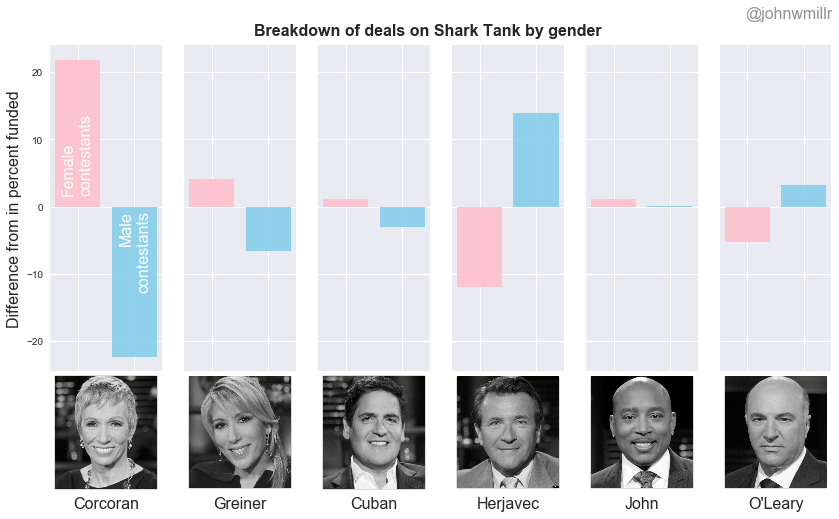

In [612]:
# gender_labels = ['Male','Female']
gender_labels = np.unique(df.gender)[:2]
fig, axs = plt.subplots(ncols=len(sharks), sharey=True, figsize=(14,6))
idxs = np.linspace(0,1,num=9)
for ax,shark,idx in zip(axs,sharks,idxs):
    percent_funded = []
    for n,gender in enumerate(gender_labels):
        num_gender = (df.gender==gender).sum()
        percent_funded.append(
            100*((df.gender==gender) * df[shark]).sum()/df[shark].sum()-gender_ratios[gender[0].lower()])
        
    # Bar plot
    ax.bar([0,1], percent_funded, color=['pink','skyblue'], alpha=0.9)
    if ax==axs[0]:
        ax.set_ylabel('Difference from in percent funded', fontsize=FS)
    ax.set_xticklabels([])
    
    if ax == axs[0]:
        ax.text(-0.3,9.5, 'Female\ncontestants', ha='left', fontsize=FS, alpha=1, rotation=90, color='w')
        ax.text(1.3,-5,'Male\ncontestants', ha='right', fontsize=FS, alpha=1, rotation=90, color='w')
    
    if ax == axs[-1]:
        ax.text(1.5, 28, "@johnwmillr", fontsize=FS, alpha=0.5, horizontalalignment='right')
        ax.text(0.5, -30, " ", fontsize=FS-2, alpha=0.5, horizontalalignment='center')
        
    im = plt.imread('./figures/sharks/{}.png'.format(shark.lower()))
    xy = [0, 0]

    imagebox = OffsetImage(im, zoom=0.2)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(28,-226),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0)
    ax.add_artist(ab)        
    ax.text(0.5, -45, shark, fontsize=FS, horizontalalignment='center')
    
plt.suptitle('Breakdown of deals on Shark Tank by gender', y=0.93, fontsize=FS, fontweight='heavy')

# fig.savefig('./figures/percent_funded.png', dpi=300)

### Effect of requested valuation on success of deal

In [125]:
for deal in [True, False]:
    valuation = df.valuation[df.deal==deal].median()
    print('The median valuation where deal is {} is ${:.2f} million'.format(deal, valuation))

The median valuation where deal is True is $0.90 million
The median valuation where deal is False is $0.83 million
